#**Categorization, Prioritization, and Summarization of Security Vulnerabilities or Weaknesses**

A system leveraging SecureBERT to analyze security vulnerabilities by:

- Categorizing the type of vulnerability
- Assigning priority levels
- Providing structured analysis of security weaknesses

In [ ]:
!pip install datasets

In [ ]:
import pandas as pd
import random

# Create sample security findings
security_data = {
    'ID': [],
    'Description': [],
    'Priority': [],
    'Category': []
}

# Sample descriptions
descriptions = [
    "SQL injection vulnerability found in login form allowing unauthorized database access",
    "Weak password policy allows brute force attacks",
    "Cross-site scripting (XSS) vulnerability in comment section",
    "Sensitive data exposure through unencrypted transmission",
    "Missing access controls in admin panel",
    "Buffer overflow vulnerability in input validation",
    "Outdated SSL certificate with known vulnerabilities",
    "Insecure direct object references in API endpoints",
    "Command injection vulnerability in file upload feature",
    "Authentication bypass in password reset functionality"
]

# Possible values
priorities = ['HIGH', 'MEDIUM', 'LOW']
categories = ['Injection', 'Authentication', 'Data Exposure', 'Access Control', 'Input Validation']

# Generate 100 sample entries
for i in range(100):
    security_data['ID'].append(f'SEC-{str(i+1).zfill(3)}')
    security_data['Description'].append(random.choice(descriptions))
    security_data['Priority'].append(random.choice(priorities))
    security_data['Category'].append(random.choice(categories))

# Create DataFrame
df = pd.DataFrame(security_data)

# Save to CSV
df.to_csv('security_findings.csv', index=False)

# Display first few rows
print("Sample of the dataset:")
print(df.head())

# Display distribution of priorities and categories
print("\nDistribution of Priorities:")
print(df['Priority'].value_counts())
print("\nDistribution of Categories:")
print(df['Category'].value_counts())

Sample of the dataset:
        ID                                        Description Priority  \
0  SEC-001  Sensitive data exposure through unencrypted tr...      LOW   
1  SEC-002  Cross-site scripting (XSS) vulnerability in co...     HIGH   
2  SEC-003             Missing access controls in admin panel     HIGH   
3  SEC-004  Sensitive data exposure through unencrypted tr...      LOW   
4  SEC-005  Insecure direct object references in API endpo...      LOW   

         Category  
0  Authentication  
1  Access Control  
2  Access Control  
3  Authentication  
4  Authentication  

Distribution of Priorities:
Priority
LOW       42
HIGH      37
MEDIUM    21
Name: count, dtype: int64

Distribution of Categories:
Category
Authentication      24
Injection           22
Data Exposure       21
Input Validation    18
Access Control      15
Name: count, dtype: int64


In [ ]:
# prompt: data preprocessing to see the insight of it

import pandas as pd

# Load the dataset
df = pd.read_csv('security_findings.csv')

# Display basic statistics
print(df.describe(include='all'))

# Explore data types
print("\nData Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Analyze the 'Description' column (example)
print("\nDescription Column Analysis:")
print(df['Description'].value_counts())  # Count occurrences of each description
# You can also explore word frequencies or other textual analysis techniques here

# Further analysis based on Priority and Category
print("\nAnalysis by Priority:")
for priority in df['Priority'].unique():
    print(f"  Priority: {priority}")
    print(df[df['Priority'] == priority]['Category'].value_counts())

print("\nAnalysis by Category:")
for category in df['Category'].unique():
    print(f"  Category: {category}")
    print(df[df['Category'] == category]['Priority'].value_counts())

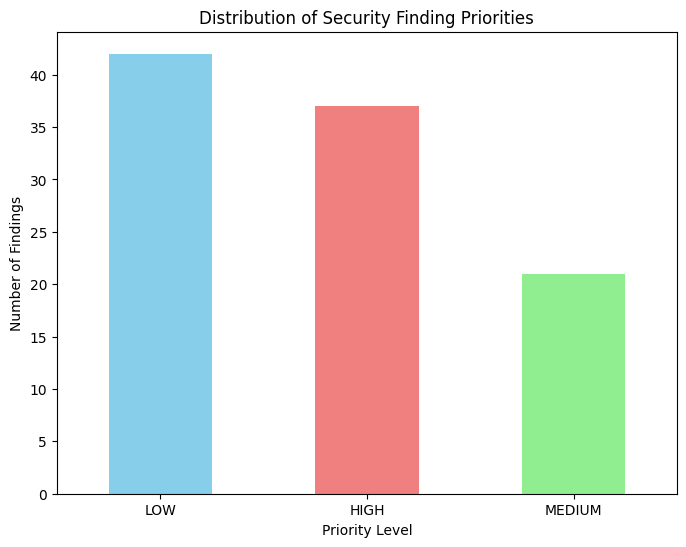

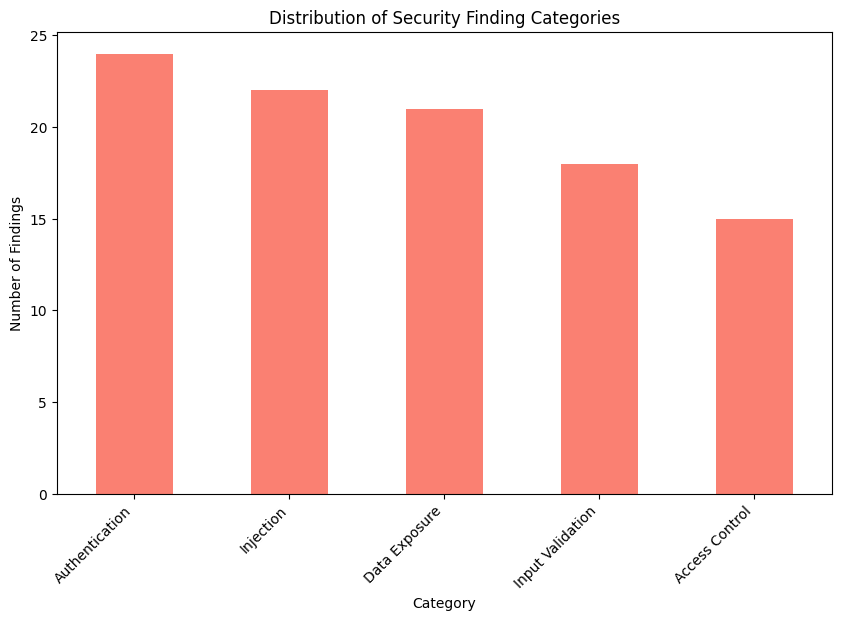

In [ ]:
# prompt: using bar chart as well

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already created and saved as 'security_findings.csv')
df = pd.read_csv('security_findings.csv')

# Bar chart for Priority distribution
plt.figure(figsize=(8, 6))
df['Priority'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Security Finding Priorities')
plt.xlabel('Priority Level')
plt.ylabel('Number of Findings')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()


# Bar chart for Category distribution
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribution of Security Finding Categories')
plt.xlabel('Category')
plt.ylabel('Number of Findings')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# get the NLP model from https://github.com/ehsanaghaei/SecureBERT
from transformers import RobertaTokenizer, RobertaModel
import torch

# need that for preprocessing of BERT arch
tokenizer = RobertaTokenizer.from_pretrained("ehsanaghaei/SecureBERT")
#actual model
model = RobertaModel.from_pretrained("ehsanaghaei/SecureBERT")



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at ehsanaghaei/SecureBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

In [ ]:
#testing
inputs = tokenizer("This is SecureBERT!", return_tensors="pt", padding=True, truncation=True)
print(inputs.keys())
inputs

dict_keys(['input_ids', 'attention_mask'])


{'input_ids': tensor([[    0,   713,    16, 27443, 33362,   328,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
outputs = model(**inputs)
print(outputs.keys())
#last_hidden_states = outputs.last_hidden_state
outputs

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#Now work on dataset
#load, check
df = pd.read_csv("security_findings.csv")
print("Initial columns:", df.columns.tolist())

# encoders for results
priority_encoder = LabelEncoder()
category_encoder = LabelEncoder()

df['priority_encoded'] = priority_encoder.fit_transform(df['Priority'])
df['category_encoded'] = category_encoder.fit_transform(df['Category'])

# split the data
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Verify split data has encoded columns
print("\nTraining data columns:", train_df.columns.tolist())

In [ ]:
train_df.head()

,ID,Description,Priority,Category,priority_encoded,category_encoded
55,SEC-056,Authentication bypass in password reset functi...,LOW,Input Validation,1,4
88,SEC-089,Cross-site scripting (XSS) vulnerability in co...,LOW,Access Control,1,0
26,SEC-027,Outdated SSL certificate with known vulnerabil...,HIGH,Authentication,0,1
42,SEC-043,Insecure direct object references in API endpo...,HIGH,Authentication,0,1
69,SEC-070,SQL injection vulnerability found in login for...,LOW,Access Control,1,0


In [ ]:
# Now BERTs preprocess of tokenizing
# Tokenize training data
train_encodings = tokenizer(
    train_df['Description'].tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

# Tokenize evaluation data
eval_encodings = tokenizer(
    eval_df['Description'].tolist(),
    truncation=True,
    padding=True,
    return_tensors='pt'
)

train_encodings.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
#Convert labels to tensors
train_priority_labels = torch.tensor(train_df['priority_encoded'].values)
train_category_labels = torch.tensor(train_df['category_encoded'].values)

eval_priority_labels = torch.tensor(eval_df['priority_encoded'].values)
eval_category_labels = torch.tensor(eval_df['category_encoded'].values)

In [ ]:
# Check
print("\n Shapes:")
print("Train encodings:", train_encodings['input_ids'].shape)
print("Train priority labels:", train_priority_labels.shape)
print("Train category labels:", train_category_labels.shape)
print("\nUnique values:")
print("Priority classes:", priority_encoder.classes_)
print("Category classes:", category_encoder.classes_)


Shapes:
Train encodings: torch.Size([80, 13])
Train priority labels: torch.Size([80])
Train category labels: torch.Size([80])

Unique values:
Priority classes: ['HIGH' 'LOW' 'MEDIUM']
Category classes: ['Access Control' 'Authentication' 'Data Exposure' 'Injection'
 'Input Validation']


In [ ]:
# Add classification heads in pt way
priority_classifier = torch.nn.Linear(model.config.hidden_size, len(priority_encoder.classes_))
category_classifier = torch.nn.Linear(model.config.hidden_size, len(category_encoder.classes_))


In [ ]:
# training parameters
learning_rate = 1e-5
num_epochs = 20
batch_size = 20

# optimizer
optimizer = torch.optim.Adam([
    {'params': model.parameters()},
    {'params': priority_classifier.parameters()},
    {'params': category_classifier.parameters()}
], lr=learning_rate)

In [ ]:
# loss function
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

Using device: cpu


In [ ]:
# Move models to device
model = model.to(device)
priority_classifier = priority_classifier.to(device)
category_classifier = category_classifier.to(device)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    # Process in batches
    for i in range(0, len(train_df), batch_size):
        batch_encodings = {
            'input_ids': train_encodings['input_ids'][i:i+batch_size].to(device),
            'attention_mask': train_encodings['attention_mask'][i:i+batch_size].to(device)
        }
        batch_priority = train_priority_labels[i:i+batch_size].to(device)
        batch_category = train_category_labels[i:i+batch_size].to(device)

        # Forward pass
        outputs = model(**batch_encodings)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        # Get predictions
        priority_output = priority_classifier(pooled_output)
        category_output = category_classifier(pooled_output)

        # Calculate loss
        priority_loss = criterion(priority_output, batch_priority)
        category_loss = criterion(category_output, batch_category)
        loss = priority_loss + category_loss

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print epoch stats
    avg_loss = total_loss / (len(train_df) / batch_size)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

print("Training completed!")

Epoch 1/20, Average Loss: 2.6519
Epoch 2/20, Average Loss: 2.6918
Epoch 3/20, Average Loss: 2.6971
Epoch 4/20, Average Loss: 2.6433
Epoch 5/20, Average Loss: 2.6890
Epoch 6/20, Average Loss: 2.6536
Epoch 7/20, Average Loss: 2.6582
Epoch 8/20, Average Loss: 2.6102
Epoch 9/20, Average Loss: 2.6075
Epoch 10/20, Average Loss: 2.5811
Epoch 11/20, Average Loss: 2.5388
Epoch 12/20, Average Loss: 2.5788
Epoch 13/20, Average Loss: 2.4990
Epoch 14/20, Average Loss: 2.4807
Epoch 15/20, Average Loss: 2.4445
Epoch 16/20, Average Loss: 2.5215
Epoch 17/20, Average Loss: 2.4787
Epoch 18/20, Average Loss: 2.4901
Epoch 19/20, Average Loss: 2.4426
Epoch 20/20, Average Loss: 2.4117
Training completed!


In [ ]:
# Evaluation
model.eval()
priority_classifier.eval()
category_classifier.eval()

correct_priority = 0
correct_category = 0
total = 0

with torch.no_grad():
    for i in range(0, len(eval_df), batch_size):
        batch_encodings = {
            'input_ids': eval_encodings['input_ids'][i:i+batch_size].to(device),
            'attention_mask': eval_encodings['attention_mask'][i:i+batch_size].to(device)
        }
        batch_priority = eval_priority_labels[i:i+batch_size].to(device)
        batch_category = eval_category_labels[i:i+batch_size].to(device)

        # Get predictions
        outputs = model(**batch_encodings)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        priority_output = priority_classifier(pooled_output)
        category_output = category_classifier(pooled_output)

        # Calculate accuracy
        _, predicted_priority = torch.max(priority_output, 1)
        _, predicted_category = torch.max(category_output, 1)

        correct_priority += (predicted_priority == batch_priority).sum().item()
        correct_category += (predicted_category == batch_category).sum().item()
        total += batch_priority.size(0)

priority_accuracy = 100 * correct_priority / total
category_accuracy = 100 * correct_category / total

print(f'\nTest Accuracy:')
print(f'Priority Accuracy: {priority_accuracy:.2f}%')
print(f'Category Accuracy: {category_accuracy:.2f}%')


Test Accuracy:
Priority Accuracy: 20.00%
Category Accuracy: 25.00%


In [ ]:
def predict_model(text):
    # Prepare model for inference
    model.eval()
    priority_classifier.eval()
    category_classifier.eval()

    # Tokenize input
    inputs = tokenizer(
        text,
        truncation=True,
        padding=True,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        # Get model outputs
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        # Get predictions
        priority_output = priority_classifier(pooled_output)
        category_output = category_classifier(pooled_output)

        # Convert to probabilities
        priority_probs = torch.softmax(priority_output, dim=1)
        category_probs = torch.softmax(category_output, dim=1)

        # Get predicted classes
        priority_pred = torch.argmax(priority_probs, dim=1).item()
        category_pred = torch.argmax(category_probs, dim=1).item()

        # Convert back to original labels
        priority = priority_encoder.inverse_transform([priority_pred])[0]
        category = category_encoder.inverse_transform([category_pred])[0]

        # Get confidence scores
        priority_confidence = priority_probs[0][priority_pred].item()
        category_confidence = category_probs[0][category_pred].item()

    return {
        'priority': priority,
        'priority_confidence': f"{priority_confidence:.2%}",
        'category': category,
        'category_confidence': f"{category_confidence:.2%}"
    }

# Test with some examples
test_texts = [
    "SQL injection vulnerability in login form",
    "Weak password policy allows brute force attacks",
    "Sensitive data exposed in error logs"
]

print("\nTesting predictions:")
for text in test_texts:
    result = predict_model(text)
    print(f"\nInput: {text}")
    print(f"Priority: {result['priority']} (Confidence: {result['priority_confidence']})")
    print(f"Category: {result['category']} (Confidence: {result['category_confidence']})")


Testing predictions:

Input: SQL injection vulnerability in login form
Priority: LOW (Confidence: 35.03%)
Category: Injection (Confidence: 21.09%)

Input: Weak password policy allows brute force attacks
Priority: LOW (Confidence: 35.00%)
Category: Injection (Confidence: 21.09%)

Input: Sensitive data exposed in error logs
Priority: LOW (Confidence: 35.02%)
Category: Injection (Confidence: 21.08%)


In [ ]:
# # changing architecure a bit for classification

# # Reset models and move to device
# model = RobertaModel.from_pretrained("ehsanaghaei/SecureBERT").to(device)


# # More complex classification heads
# priority_classifier = torch.nn.Sequential(
#     torch.nn.Linear(model.config.hidden_size, 512),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(512, 256),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(256, len(priority_encoder.classes_))
# ).to(device)

# category_classifier = torch.nn.Sequential(
#     torch.nn.Linear(model.config.hidden_size, 512),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(512, 256),
#     torch.nn.ReLU(),
#     torch.nn.Dropout(0.3),
#     torch.nn.Linear(256, len(category_encoder.classes_))
# ).to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at ehsanaghaei/SecureBERT and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Actual DataSet

Prepare dataset based on CWE, CVE and other public database

Step 1. Download all the NVD feeds
Step 2. Read all feeds and created the dataset in the below CSV:


CVE ID,Description,Impact,Published Date,CWE,CVSS:2.0.baseScore,CVSS:2.0.exploitabilityScore,CVSS:3.0.baseScore,CVSS:3.0.exploitabilityScore,CVSS:3.1.baseScore,CVSS:3.1.exploitabilityScore,CVSS:4.0.baseScore,CVSS:4.0.exploitabilityScore

# Data Creation  

## Step 1. Download all the NVD feeds

## Step 2. Read all feeds and created the dataset in the below CSV:

CVE ID,Description,Impact,Published Date,CWE,CVSS:2.0.baseScore,CVSS:2.0.exploitabilityScore,CVSS:3.0.baseScore,CVSS:3.0.exploitabilityScore,CVSS:3.1.baseScore,CVSS:3.1.exploitabilityScore,CVSS:4.0.baseScore,CVSS:4.0.exploitabilityScore

## Step 3. Run Script - cveExtraction.py
Script will read all feeds under cve_data folder and create the feeds in the given format in Step2 under output folder


# Data Refinement 



In [253]:
df = pd.read_csv("output/nvd_data_2002.csv")
df.head(2)

,CVE ID,Description,Impact,Published Date,CWE,CVSS:2.0.baseScore,CVSS:2.0.exploitabilityScore,CVSS:3.0.baseScore,CVSS:3.0.exploitabilityScore,CVSS:3.1.baseScore,CVSS:3.1.exploitabilityScore,CVSS:4.0.baseScore,CVSS:4.0.exploitabilityScore
0,CVE-1999-0001,ip_input.c in BSD-derived TCP/IP implementatio...,"{""baseMetricV2"": {""cvssV2"": {""version"": ""2.0"",...",1999-12-30T05:00Z,CWE-20,5.0,10.0,NONE,NONE,NONE,NONE,NONE,NONE
1,CVE-1999-0002,Buffer overflow in NFS mountd gives root acces...,"{""baseMetricV2"": {""cvssV2"": {""version"": ""2.0"",...",1998-10-12T04:00Z,CWE-119,10.0,10.0,NONE,NONE,NONE,NONE,NONE,NONE


In [254]:
df_output = pd.read_csv("output/nvd_data_2024.csv")
df_output.head(2)

,CVE ID,Description,Impact,Published Date,CWE,CVSS:2.0.baseScore,CVSS:2.0.exploitabilityScore,CVSS:3.0.baseScore,CVSS:3.0.exploitabilityScore,CVSS:3.1.baseScore,CVSS:3.1.exploitabilityScore,CVSS:4.0.baseScore,CVSS:4.0.exploitabilityScore
0,CVE-2024-0001,A condition exists in FlashArray Purity whereb...,"{""baseMetricV3"": {""cvssV3"": {""version"": ""3.1"",...",2024-09-23T18:15Z,CWE-1188,NONE,NONE,NONE,NONE,9.8,3.9,NONE,NONE
1,CVE-2024-0002,A condition exists in FlashArray Purity whereb...,"{""baseMetricV3"": {""cvssV3"": {""version"": ""3.1"",...",2024-09-23T18:15Z,NVD-CWE-noinfo,NONE,NONE,NONE,NONE,9.8,3.9,NONE,NONE


# Run script combined_cve_script.py and generate "combined_cve_data"
Script will read all new feeds and combined the feeds under final_output folder. The new output only carry following columns
CVE ID	Description	CWE	Max_Base_Score	Technical_Severity


## Logic used:
columns_to_keep = ['CVE ID', 'Description', 'CWE', 'Max_Base_Score', 'Technical_Severity']
 
 Severity logic:
 <br>IF base Score == 'NONE' : <br>
            return 'NONE  ')
        if score > 7:
            return 'HIGH'
        elif 3 <= score <= 7:
            return 'M   EDIUM'
        elif 0 <= sc
                   return 'LOW'
    <br>    else:
   e        return 'NONE'
    except:
        return 'NONE'

In [257]:
df = pd.read_csv("final_output/combined_cve_data.csv")
df.head(10)

,CVE ID,Description,CWE,Max_Base_Score,Technical_Severity
0,CVE-1999-0001,ip_input.c in BSD-derived TCP/IP implementatio...,CWE-20,5.0,MEDIUM
1,CVE-1999-0002,Buffer overflow in NFS mountd gives root acces...,CWE-119,10.0,HIGH
2,CVE-1999-0003,Execute commands as root via buffer overflow i...,NVD-CWE-Other,10.0,HIGH
3,CVE-1999-0004,"MIME buffer overflow in email clients, e.g. So...",NVD-CWE-Other,5.0,MEDIUM
4,CVE-1999-0005,Arbitrary command execution via IMAP buffer ov...,NVD-CWE-Other,10.0,HIGH
5,CVE-1999-0006,Buffer overflow in POP servers based on BSD/Qu...,NVD-CWE-Other,10.0,HIGH
6,CVE-1999-0007,Information from SSL-encrypted sessions via PK...,CWE-327,5.0,MEDIUM
7,CVE-1999-0008,"Buffer overflow in NIS+, in Sun's rpc.nisd pro...",NVD-CWE-Other,10.0,HIGH
8,CVE-1999-0009,Inverse query buffer overflow in BIND 4.9 and ...,NVD-CWE-Other,10.0,HIGH
9,CVE-1999-0010,Denial of Service vulnerability in BIND 8 Rele...,NVD-CWE-Other,5.0,MEDIUM


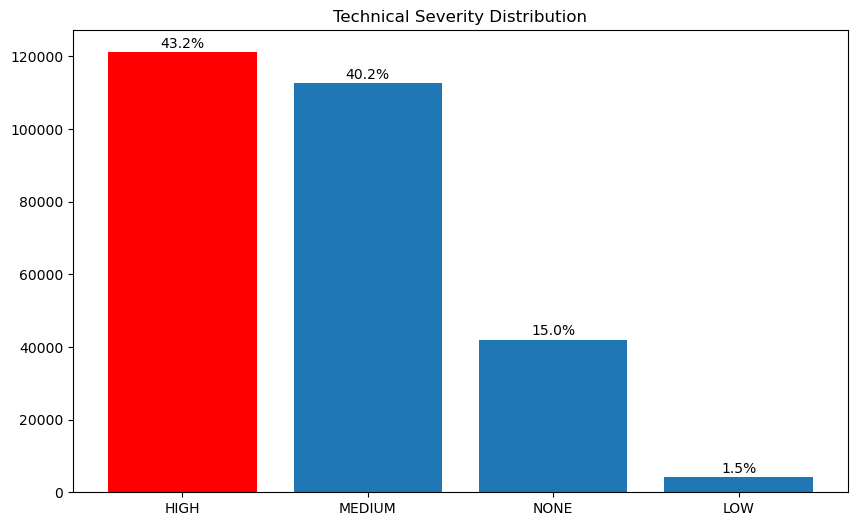

In [258]:
df = pd.read_csv('final_output/combined_cve_data.csv')
plt.figure(figsize=(10,6))

counts = df['Technical_Severity'].value_counts()
total = len(df)
percentages = (counts / total * 100).round(1)

# Create color list - default blue, but red for highest percentage
colors = ['#1f77b4'] * len(counts)  # Default blue for all bars
max_pct_idx = percentages.argmax()  # Get index of highest percentage
colors[max_pct_idx] = 'red'         # Set highest to red

bars = plt.bar(counts.index, counts.values, color=colors)

# Add percentage annotations above each bar
for i, v in enumerate(percentages):
    plt.annotate(f'{v}%', 
                xy=(i, counts[i]),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center')

plt.title('Technical Severity Distribution')
plt.savefig('severity_distribution.png')

In [260]:
"Total records",len(df)

('Total records', 280139)

In [261]:
import os
s_bytes = os.path.getsize("final_output/combined_cve_data.csv")
f"File size: {s_bytes/(1024*1024*1024):.2f} GB"

'File size: 0.09 GB'

# Data is imbalance

### Run Script oversampling.py to balance the dataset.
Once script complted sucessfully then a new file will be created under final_output/combined_cve_data_balanced.csv

New Distribution: <b><br> 
HIGH: 121134 (31.2%)<br> 
LOW: 112691 (29.0%<br> MEDIUM: 112691 (29.0<br> %)
NONE: 42039 (10.8%)

### combined_cve_data_balanced.csv



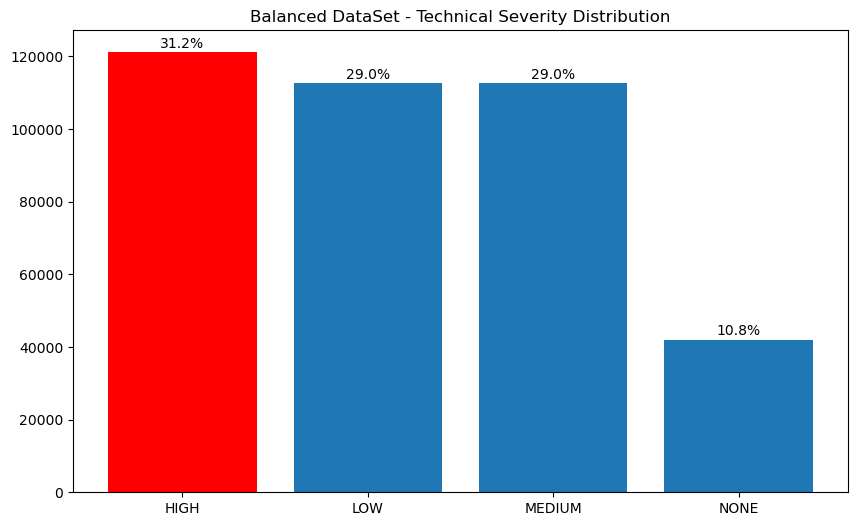

In [263]:
df = pd.read_csv('final_output/combined_cve_data_balanced.csv', dtype='unicode')
plt.figure(figsize=(10,6))
counts = df['Technical_Severity'].value_counts()
total = len(df)
percentages = (counts / total * 100).round(1)

# Create color list - default blue, but red for highest percentage
colors = ['#1f77b4'] * len(counts)  # Default blue for all bars
max_pct_idx = percentages.argmax()  # Get index of highest percentage
colors[max_pct_idx] = 'red'         # Set highest to red

bars = plt.bar(counts.index, counts.values, color=colors)

# Add percentage annotations above each bar
for i, v in enumerate(percentages):
    plt.annotate(f'{v}%', 
                xy=(i, counts[i]),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center')

plt.title('Balanced DataSet - Technical Severity Distribution')
plt.savefig('severity_distribution.png')

## Categorization
The dataset is balanced. For our purpose, we need to add an additional column called 'Category.' This will represent the category of the CVE. 
First tried simple keyword search by using categorized_cves.py

We will use LLM calls to fill this data.


In [293]:
df = pd.read_csv('final_output/combined_cve_data_balanced_and_categorized2.csv', dtype='unicode')
plt.figure(figsize=(10,6))
df.head()

,CVE ID,Description,CWE,Max_Base_Score,Technical_Severity,Vulnerability_Category
0,CVE-2005-0143,Firefox before 1.0 and Mozilla before 1.7.5 di...,NaN,2.6,LOW,Uncategorized
1,CVE-2020-1795,There is a logic error vulnerability in severa...,NaN,2.4,LOW,Uncategorized
2,CVE-2014-2432,Unspecified vulnerability Oracle the MySQL Ser...,NaN,2.8,LOW,Uncategorized
3,CVE-2002-1319,"The Linux kernel 2.4.20 and earlier, and 2.5.x...",NaN,2.1,LOW,Uncategorized
4,CVE-2015-4961,IBM Tealeaf Customer Experience 8.x before 8.7...,200.0,2.9,LOW,Data Exposure


<Figure size 1000x600 with 0 Axes>

In [295]:
df['Vulnerability_Category'].value_counts()

Uncategorized                  306645
XSS (Cross-Site Scripting)      33044
Data Exposure                   18928
Injection                       15232
Access Control Issues            5887
Authentication Issues            5227
Cloud Security Issues            1262
Insecure Deserialization         1008
Network Security                  609
Security Misconfiguration         593
Supply Chain Attacks              119
Using Vulnerable Components         1
Name: Vulnerability_Category, dtype: int64

In [311]:
df.head()

,CVE ID,Description,CWE,Max_Base_Score,Technical_Severity,Vulnerability_Category
0,CVE-2005-0143,Firefox before 1.0 and Mozilla before 1.7.5 di...,NaN,2.6,LOW,Uncategorized
1,CVE-2020-1795,There is a logic error vulnerability in severa...,NaN,2.4,LOW,Uncategorized
2,CVE-2014-2432,Unspecified vulnerability Oracle the MySQL Ser...,NaN,2.8,LOW,Uncategorized
3,CVE-2002-1319,"The Linux kernel 2.4.20 and earlier, and 2.5.x...",NaN,2.1,LOW,Uncategorized
4,CVE-2015-4961,IBM Tealeaf Customer Experience 8.x before 8.7...,200.0,2.9,LOW,Data Exposure


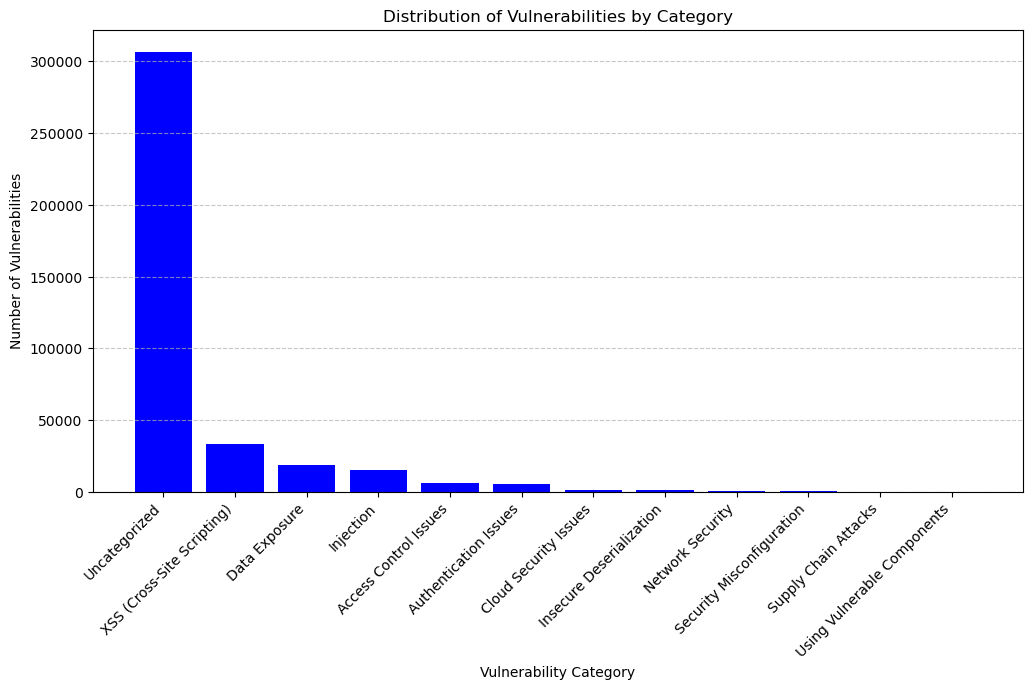

In [325]:
import matplotlib.pyplot as plt

# Count the number of vulnerabilities in each category
category_counts = df["Vulnerability_Category"].value_counts()



plt.figure(figsize=(12, 6))

plt.bar(category_counts.index, category_counts.values, color="blue")
plt.xlabel("Vulnerability Category")
plt.ylabel("Number of Vulnerabilities")
plt.title("Distribution of Vulnerabilities by Category")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

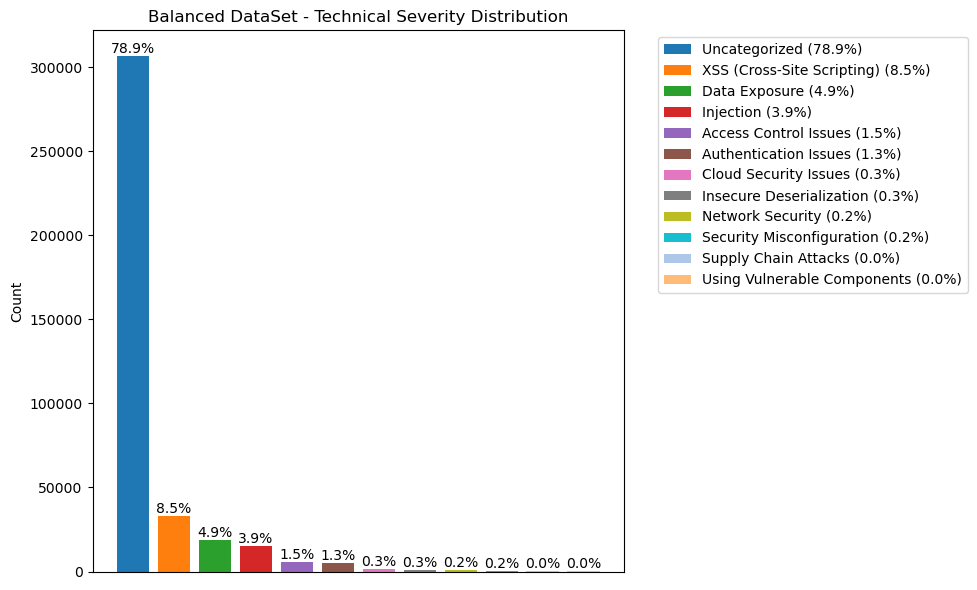

In [331]:
# better graph
plt.figure(figsize=(10,6))
category_counts = df['Vulnerability_Category'].value_counts()
total = len(df)
percentages = (category_counts / total * 100).round(1)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', 
         '#aec7e8', '#ffbb78']

bars = plt.bar(range(len(category_counts)), category_counts.values, color=colors)

# Add percentage labels on bars
for i, bar in enumerate(bars):
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{(height/total*100):.1f}%',
            ha='center', va='bottom')

plt.title('Balanced DataSet - Technical Severity Distribution')
plt.ylabel('Count')
plt.xticks([])

# Add legend with percentages
legend_labels = [f"{cat} ({(count/total*100):.1f}%)" 
               for cat, count in zip(counts.index, counts.values)]
plt.legend(bars, legend_labels,
         bbox_to_anchor=(1.05, 1),
         loc='upper left')

plt.tight_layout()
plt.savefig('severity_distribution.png', bbox_inches='tight')

In [335]:
# Read the existing categorized data
df = pd.read_csv('final_output/combined_cve_data_balanced_and_categorized2.csv', dtype='unicode')

# Extract uncategorized entries
uncategorized_df = df[df['Vulnerability_Category'] == 'Uncategorized']

# Save uncategorized entries to new CSV
uncategorized_df.to_csv('final_output/uncategorized_vulnerabilities.csv', index=False)

print(f"Total uncategorized entries: {len(uncategorized_df)}")
print(f"Saved to: uncategorized_vulnerabilities.csv")

# Create CSV without uncategorized entries
categorized_df = df[df['Vulnerability_Category'] != 'Uncategorized']
categorized_df.to_csv('final_output/categorized_vulnerabilities.csv', index=False)

Total uncategorized entries: 306645
Saved to: uncategorized_vulnerabilities.csv


In [336]:
# Read the existing uncategorized_vulnerabilities data
df = pd.read_csv('final_output/uncategorized_vulnerabilities.csv', dtype='unicode')
df.head()

,CVE ID,Description,CWE,Max_Base_Score,Technical_Severity,Vulnerability_Category
0,CVE-2005-0143,Firefox before 1.0 and Mozilla before 1.7.5 di...,NaN,2.6,LOW,Uncategorized
1,CVE-2020-1795,There is a logic error vulnerability in severa...,NaN,2.4,LOW,Uncategorized
2,CVE-2014-2432,Unspecified vulnerability Oracle the MySQL Ser...,NaN,2.8,LOW,Uncategorized
3,CVE-2002-1319,"The Linux kernel 2.4.20 and earlier, and 2.5.x...",NaN,2.1,LOW,Uncategorized
4,CVE-2014-4652,Race condition in the tlv handler functionalit...,362.0,1.9,LOW,Uncategorized


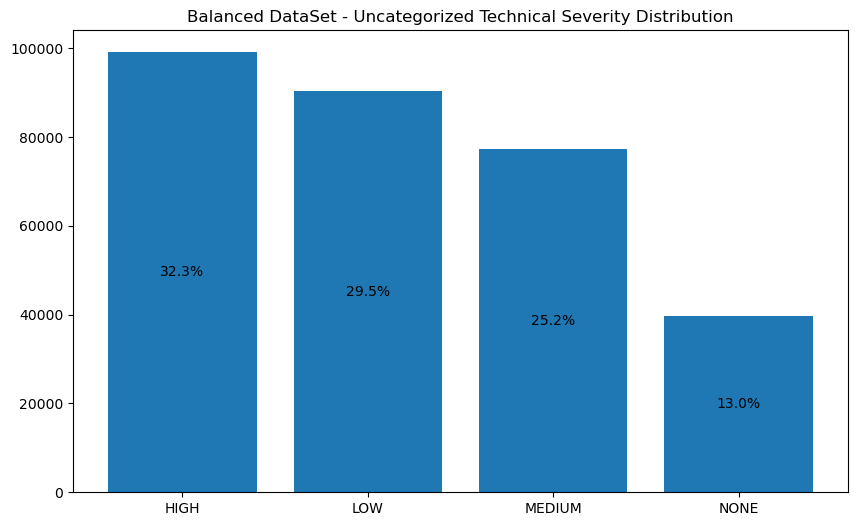

In [343]:
plt.figure(figsize=(10,6))

# Calculate counts and percentages
Technical_Severity_counts = df['Technical_Severity'].value_counts()
total = len(df)
percentages = (Technical_Severity_counts / total * 100).round(1)

# Create bars
bars = plt.bar(Technical_Severity_counts.index, Technical_Severity_counts.values)

# Add percentage labels in middle of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,  # Changed to height/2
             f'{height/total*100:.1f}%',
             ha='center', va='center')  # Changed to 'center'

plt.title('Balanced DataSet - Uncategorized Technical Severity Distribution')
plt.savefig('severity_distribution.png')

In [345]:
df.head()

,CVE ID,Description,CWE,Max_Base_Score,Technical_Severity,Vulnerability_Category
0,CVE-2005-0143,Firefox before 1.0 and Mozilla before 1.7.5 di...,NaN,2.6,LOW,Uncategorized
1,CVE-2020-1795,There is a logic error vulnerability in severa...,NaN,2.4,LOW,Uncategorized
2,CVE-2014-2432,Unspecified vulnerability Oracle the MySQL Ser...,NaN,2.8,LOW,Uncategorized
3,CVE-2002-1319,"The Linux kernel 2.4.20 and earlier, and 2.5.x...",NaN,2.1,LOW,Uncategorized
4,CVE-2014-4652,Race condition in the tlv handler functionalit...,362.0,1.9,LOW,Uncategorized
